# Case-study on real Time dataset using Artificial Neural Networks

sumber:https://github.com/ak-cell/Case-study-using-ANN-1

### Importing the libraries

In [31]:
#Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

### import dataset yang digunakan

In [32]:
#Import the dataset
data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
data.shape

(10000, 14)

Dataset berisi 10.000 baris dan 14 kolom. Artinya terdapat 10.000 nasabah di bank dan studi dilakukan pada 14 parameter yang terbagi menjadi 14 kolom berbeda.

1) RowNumber: Nomor seri kumpulan data.

2) CustomerId: Nomor id yang diberikan oleh bank kepada nasabah.

3) Surname: Nama belakang pelanggan.

4) Credit score: Nilai kredit adalah ukuran kemampuan individu untuk membayar kembali jumlah yang dipinjam. Ini adalah representasi numerik dari kelayakan kredit mereka. Skor kredit adalah angka 3 digit yang berada dalam kisaran 300-900, 900 adalah yang tertinggi. Anda harus selalu berupaya mencapai skor kredit yang mendekati 900.

5) Geogrphy: Lokasi pelanggan.

6) Gender: Jenis kelamin pelanggan.

7) Age: Usia pelanggan.

8) Tenure: Waktu dari mana nasabah diasosiasikan dengan bank.

9) Balance: Jumlah yang disimpan oleh pelanggan di bank.

10) NumOfProducts: Jumlah produk yang digunakan oleh nasabah dari bank.

11) HasCrCard: Menggunakan kartu kredit bank atau tidak. Jika ya, 1 tidak maka 0.

12) IsActiveMember: Nasabah aktif di bank atau bukan. Jika ya, 1 tidak maka 0.

13) EstimatedSalary: Gaji yang diterima pelanggan di tempat kerjanya.

14) Exited: Keluar dari bank atau tidak. Jika ya, 1 tidak maka 0.


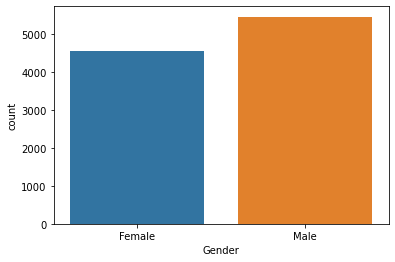

In [34]:
sb.countplot(data['Gender'])

Plot diatas menunjukkan bahwa nasabah Pria lebih banyak daripada nasabah Wanita

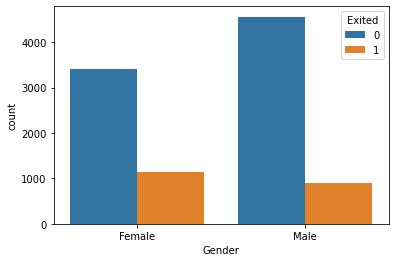

In [35]:
sb.countplot(x=data['Gender'],hue=data['Exited'])

Perbandingan jumlah nasabah yang keluar berdasarkan jenis kelamin

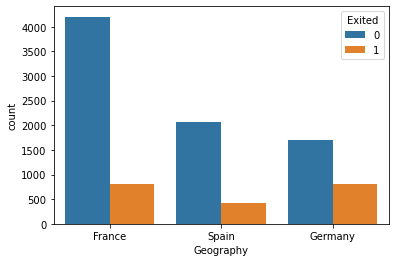

In [36]:
sb.countplot(x=data['Geography'],hue=data['Exited'])

Perbandingan nasabah yang keluar berdasarkan negara 

## Data Preprocessing

In [37]:
x=data.iloc[:,3:13].values
y=data.iloc[:,13].values

In [38]:
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [39]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

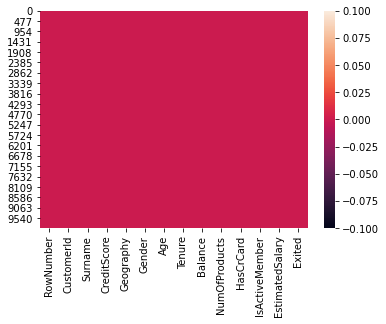

In [40]:
sb.heatmap(data.isnull())

The heatmap menunjukkan bahwa tidak ada nilai nol dalam kumpulan data

In [41]:
#Encoding catagorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_x_1=LabelEncoder()
x[:,1]=labelencoder_x_1.fit_transform(x[:,1])
labelencoder_x_2=LabelEncoder()
x[:,2]=labelencoder_x_2.fit_transform(x[:,2])
x

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

### Splitting the dataset into train and test set

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [44]:
x_test

array([[-0.55204276,  0.3131264 , -1.09168714, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-1.31490297, -0.89294542, -1.09168714, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [ 0.57162971,  1.51919821, -1.09168714, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.74791227,  1.51919821,  0.91601335, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-0.00566991,  0.3131264 ,  0.91601335, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-0.79945688,  0.3131264 ,  0.91601335, ...,  0.64259497,
        -1.03227043,  1.61255917]])

## Building the ANN menggunakan keras

### import the keras libraries

In [45]:
import keras
from keras.models import Sequential
from keras.layers import Dense

### Initialising the ANN

In [46]:
classifier=Sequential()

### Adding the input and first hidden layer

In [47]:
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=10))

### Adding the second hidden layer

In [48]:
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))

### Adding the output layer

In [49]:
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

### Compiling the ANN

In [50]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Training the ANN model on the Training set

In [51]:
classifier.fit(x_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
800/800 [==============================] - 1s 739us/step - loss: 0.4864 - accuracy: 0.7959
Epoch 2/100
800/800 [==============================] - 1s 759us/step - loss: 0.4335 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 1s 713us/step - loss: 0.4282 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 1s 735us/step - loss: 0.4233 - accuracy: 0.8146
Epoch 5/100
800/800 [==============================] - 1s 730us/step - loss: 0.4205 - accuracy: 0.8276
Epoch 6/100
800/800 [==============================] - 1s 793us/step - loss: 0.4189 - accuracy: 0.8285
Epoch 7/100
800/800 [==============================] - 1s 774us/step - loss: 0.4172 - accuracy: 0.8317
Epoch 8/100
800/800 [==============================] - 1s 740us/step - loss: 0.4159 - accuracy: 0.8306
Epoch 9/100
800/800 [==============================] - 1s 752us/step - loss: 0.4145 - accuracy: 0.8328
Epoch 10/100
800/800 [==============================] - 1s 804us/step - l

800/800 [==============================] - 1s 756us/step - loss: 0.4004 - accuracy: 0.8339
Epoch 80/100
800/800 [==============================] - 1s 695us/step - loss: 0.4004 - accuracy: 0.8354
Epoch 81/100
800/800 [==============================] - 1s 799us/step - loss: 0.4004 - accuracy: 0.8356
Epoch 82/100
800/800 [==============================] - 1s 768us/step - loss: 0.4004 - accuracy: 0.8350
Epoch 83/100
800/800 [==============================] - 1s 733us/step - loss: 0.4007 - accuracy: 0.8350
Epoch 84/100
800/800 [==============================] - 1s 737us/step - loss: 0.4006 - accuracy: 0.8351
Epoch 85/100
800/800 [==============================] - 1s 736us/step - loss: 0.4008 - accuracy: 0.8351
Epoch 86/100
800/800 [==============================] - 1s 785us/step - loss: 0.4000 - accuracy: 0.8355
Epoch 87/100
800/800 [==============================] - 1s 743us/step - loss: 0.4003 - accuracy: 0.8341
Epoch 88/100
800/800 [==============================] - 1s 782us/step - loss:

Pada Machine Learning terdapat istilah Epoch. 1 Epoch adalah melakukan proses Training (Update Bobot) pada seluruh data Training sebanyak 1 kali. Untuk meningkatkan kualitas model, biasanya digunakan lebih dari 1 Epoch

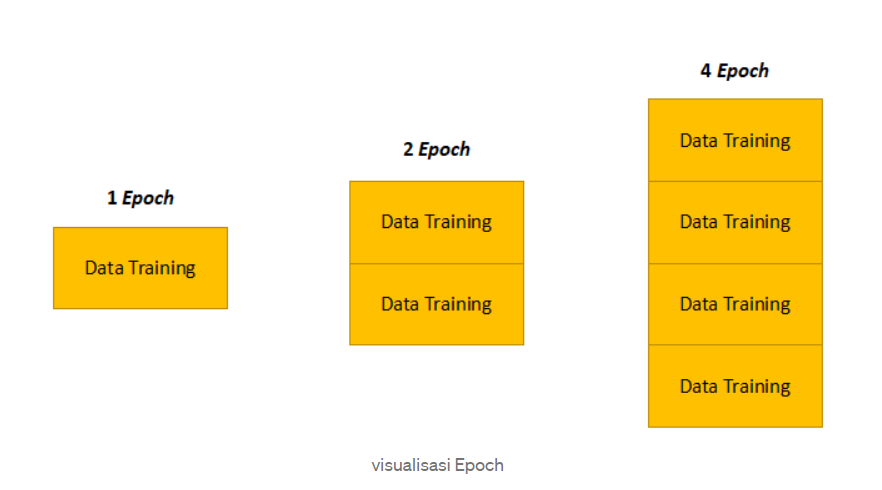


Tapi, mengapa kita perlu lebih dari satu Epoch? Kita tahu itu tidak masuk akal di awal bahwa melewati seluruh dataset melalui jaringan saraf tidak cukup dan kita perlu melewati dataset penuh beberapa kali ke jaringan saraf yang sama. Namun perlu diingat bahwa kita menggunakan dataset yang terbatas dan untuk mengoptimalkan pembelajaran dan grafik yang kita gunakan adalah Gradient Descent yang merupakan proses iteratif. Jadi, mengupdate weight (bobot) dengan satu epoch saja tidak cukup.

Satu epoch mengarah pada underfitting pada grafik (di bawah).
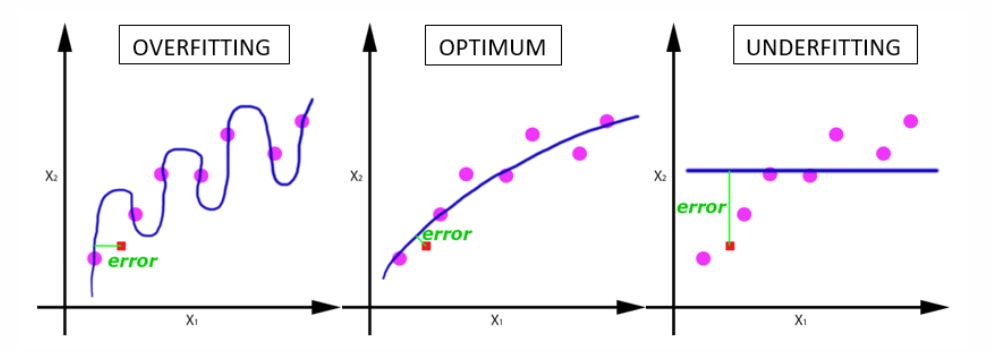

Seiring bertambahnya jumlah epoch, semakin banyak pula weight (bobot) yang berubah dalam Neural Network dan kurvanya melengkung dari kurva yang kurang sesuai hingga selaras dengan kurva yang overfitting.

Lalu berapakah jumlah epoch yang harus kita tentukan? Sayangnya, tidak ada jawaban yang benar untuk pertanyaan ini. Jawabannya berbeda untuk dataset yang berbeda tapi anda bisa mengatakan bahwa jumlah epoch terkait dengan beragamnya data anda, jadi jumlah epoch tergantung dataset yang anda miliki.

secara teori:
1. Menginisialiasikan bobot
2. menyajikan pola dan target output
3. hitung ouput dengan menggunakan rumus
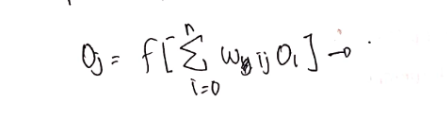
4. update bobot dengan menggunakan rumus
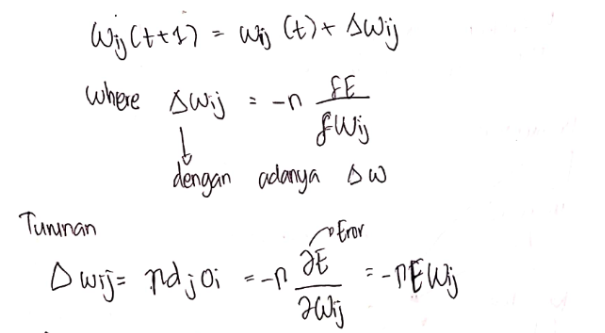
ulangi mulai dari 2 hingga tingkat kesalahan yang dapat diterima
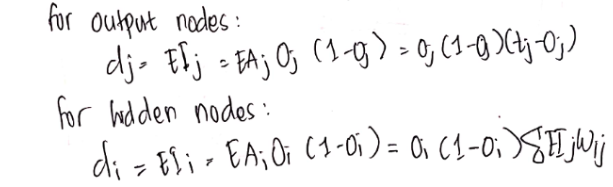

### Predicting the results of the Test set

In [52]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

In [53]:
#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy score:',accuracy_score(y_test,y_pred))

accuracy score: 0.839


Tingkat keakurasian diatas sebesar 0.8435 atau 84,35%